In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import fbeta_score, make_scorer

In [2]:
from scipy.io import arff

with open('1year.arff','r') as f:
    data1, meta1 = arff.loadarff(f)
    data1 = np.asarray(data1.tolist(), dtype=np.float32)
    print(data1.shape)

with open('2year.arff','r') as f:
    data2, meta2 = arff.loadarff(f)
    data2 = np.asarray(data2.tolist(), dtype=np.float32)
    print(data2.shape)

with open('3year.arff','r') as f:
    data3, meta3 = arff.loadarff(f)
    data3 = np.asarray(data3.tolist(), dtype=np.float32)
    print(data3.shape)

with open('4year.arff','r') as f:
    data4, meta4 = arff.loadarff(f)
    data4 = np.asarray(data4.tolist(), dtype=np.float32)
    print(data4.shape)

with open('5year.arff','r') as f:
    data5, meta5 = arff.loadarff(f)
    data5 = np.asarray(data5.tolist(), dtype=np.float32)
    print(data5.shape)


(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [3]:
data = np.concatenate([data1, data2, data3, data4, data5], axis=0)
data[np.isnan(data)] = 0

X, y = data[:,:-1], data[:, -1]
X, y, idx = balanced_sampling(X, y, r = 3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print(f'X.shape={X.shape}, y.shape={y.shape}')

a=0.10662111516202229, r=3, gamma=19.758010521281683
X.shape=(8362, 64), y.shape=(8362,)


# Naive fit

In [6]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.7054603427660423

# Validation Curves

In [4]:
n_neighbors_range = list(set(list(range(1, 11)) + list(exp_range(1, 50, increment=1, exp=1.5))))
n_neighbors_range.sort()

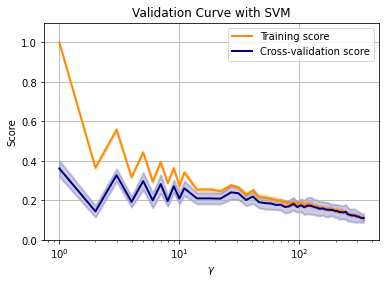

In [5]:
# k - recall

scoring = 'recall'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores_r, test_scores_r = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=n_neighbors_range,
                      cv=cv, scoring=scoring, n_jobs=8)

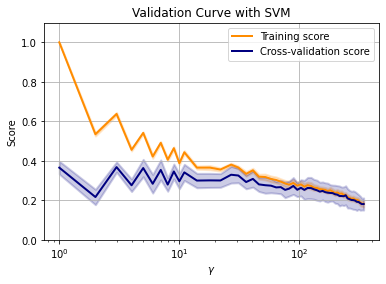

In [6]:
# k - f1

scoring = 'f1'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores_f1, test_scores_f1 = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=n_neighbors_range,
                      cv=cv, scoring=scoring, n_jobs=8)

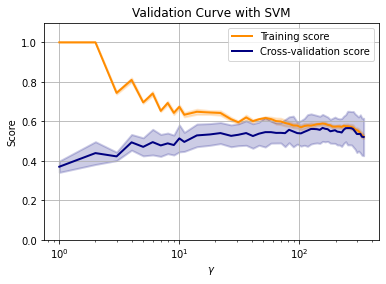

In [7]:
# k - precision

scoring = 'precision'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores_p, test_scores_p = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=n_neighbors_range,
                      cv=cv, scoring=scoring, n_jobs=8)

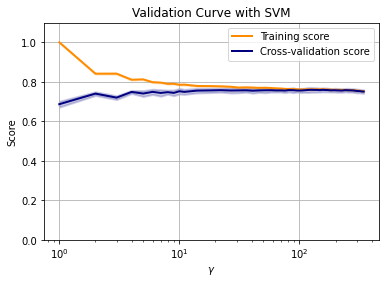

In [8]:
# k - accuracy
scoring = 'accuracy'
classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores_a, test_scores_a = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=n_neighbors_range,
                      cv=cv, scoring=scoring, n_jobs=8)

# Learning Curves

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=)

title = 'Decision Tree Learning Curves'
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
plt = plot_learning_curve(classifier, title, X, y, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='f1')